In [1]:
import torch as T
import pickle

from dataset import *
from model import *

from mlp_layout import *
from mlp_layout_bias import *
from mlp_layout_dropout import *

device = T.device("cuda" if T.cuda.is_available() else "cpu")

## Learning Curves of Pipeline Models
- Contains the learning curves for:
    - Progress Tracker
    - Object Placer trained with Original (Academic Papers)
    - Object Placer trained with BookSum

### Helper Functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_log(filename, title):
    log = json.load(open(filename, 'r'))

    mean_loss_per_epoch = {'train': [], 'val': []}

    for epoch in log:
        mean_train_tok = np.mean(log[epoch]['train']['ls_tok'])
        mean_train_obj = np.mean(log[epoch]['train']['ls_obj'])
        mean_val_tok = np.mean(log[epoch]['val']['ls_tok'])
        mean_val_obj = np.mean(log[epoch]['val']['ls_obj'])

        mean_loss_per_epoch['train'].append(mean_train_tok + mean_train_obj)
        mean_loss_per_epoch['val'].append(mean_val_tok + mean_val_obj)

    plt.plot(range(len(log)), mean_loss_per_epoch['train'], label='training loss')
    plt.plot(range(len(log)), mean_loss_per_epoch['val'], label='validation loss')

    plt.xlabel('Epochs')
    plt.ylabel('Mean Loss')
    plt.title(title)
    plt.grid(True)
    plt.legend()

    plt.show()
    print("Minimum Mean Loss:", round(min(mean_loss_per_epoch['val']), 4))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_log_bbox(filename, title):
    log = json.load(open(filename, 'r'))

    mean_loss_per_epoch = {'train': [], 'val': []}

    for epoch in log:
        mean_train = np.mean(log[epoch]['train'])
        mean_val = np.mean(log[epoch]['val'])

        mean_loss_per_epoch['train'].append(mean_train)
        mean_loss_per_epoch['val'].append(mean_val)

    plt.plot(range(len(log)), mean_loss_per_epoch['train'], label='training loss')
    plt.plot(range(len(log)), mean_loss_per_epoch['val'], label='validation loss')

    plt.xlabel('Epochs')
    plt.ylabel('Mean Loss')
    plt.title(title)
    plt.grid(True)
    plt.legend()

    plt.show()
    print("Minimum Mean Loss:", round(min(mean_loss_per_epoch['val']), 4))

### Progress Tracker (transfer learning)

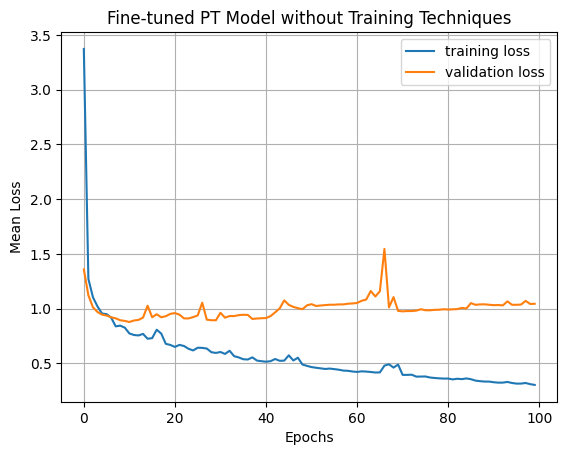

Minimum Mean Loss: 0.8785


In [4]:
# original
plot_log('./training_scripts/learning_curves/storybook_model_base_final.json', "Fine-tuned PT Model without Training Techniques")

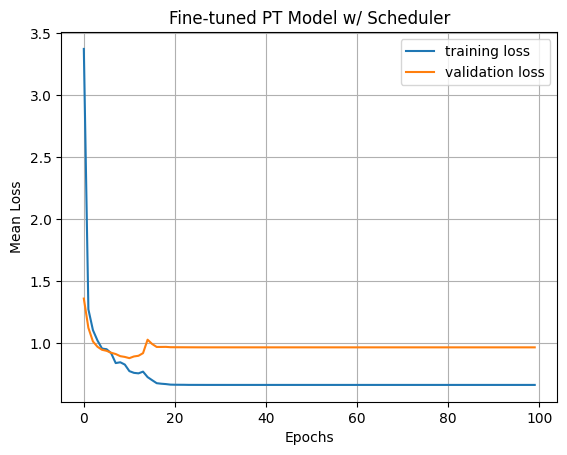

Minimum Mean Loss: 0.8785


In [5]:
plot_log('./training_scripts/learning_curves/storybook_model_lr_best.json', "Fine-tuned PT Model w/ Scheduler")

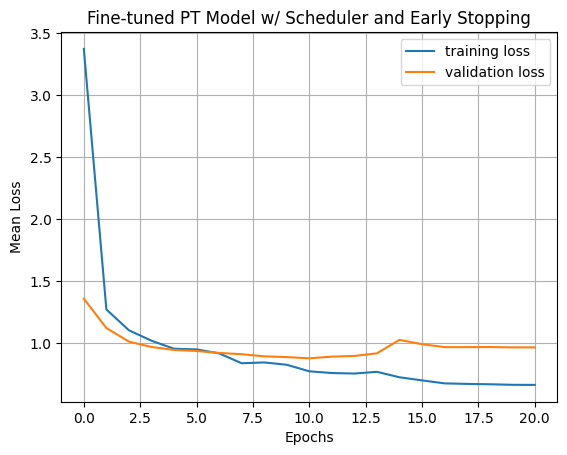

Minimum Mean Loss: 0.8785


In [6]:
# with lr scheduler and early stopping
plot_log('./training_scripts/learning_curves/storybook_model_earlystop_best.json', "Fine-tuned PT Model w/ Scheduler and Early Stopping")

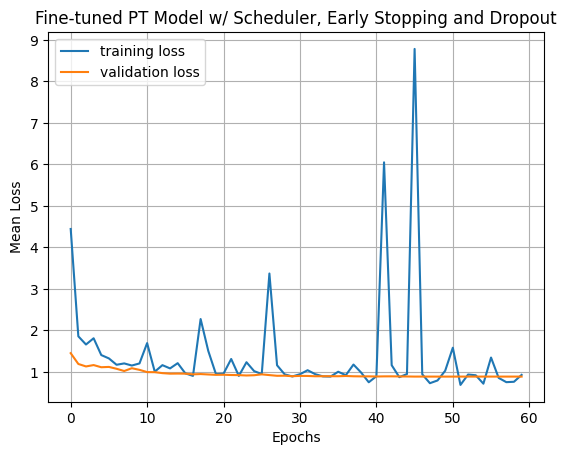

Minimum Mean Loss: 0.8844


In [7]:
# with lr scheduler and dropout and early stopping
plot_log('./training_scripts/learning_curves/storybook_model_dropout_best.json', "Fine-tuned PT Model w/ Scheduler, Early Stopping and Dropout")

### Base Object Placer without Hyperparameters

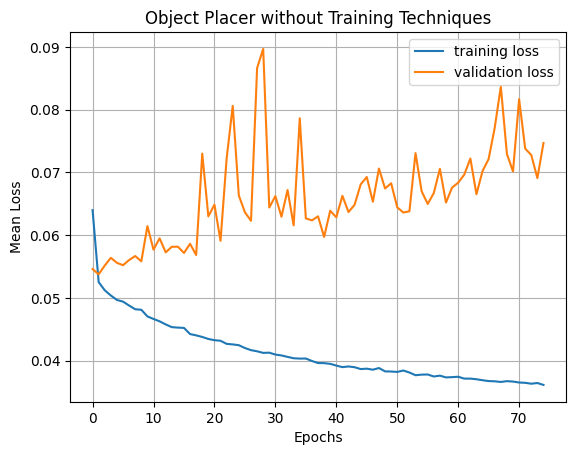

Minimum Mean Loss: 0.0537


In [8]:
# original
plot_log_bbox('./training_scripts/learning_curves/locmodel_final_base.json', "Object Placer without Training Techniques")

### Object Placer on Original Dataset
Contains the following variants:
- Trained with learning rate scheduler and MSE Loss
- Trained with learning rate scheduler and CIOU Loss
- Trained with learning rate scheduler, early stopping, and MSE Loss
- Trained with learning rate scheduler, early stopping, and CIOU Loss
- Trained with learning rate scheduler, early stopping, dropout, and MSE Loss
- Trained with learning rate scheduler, early stopping, dropout, and CIOU Loss

#### Scheduler

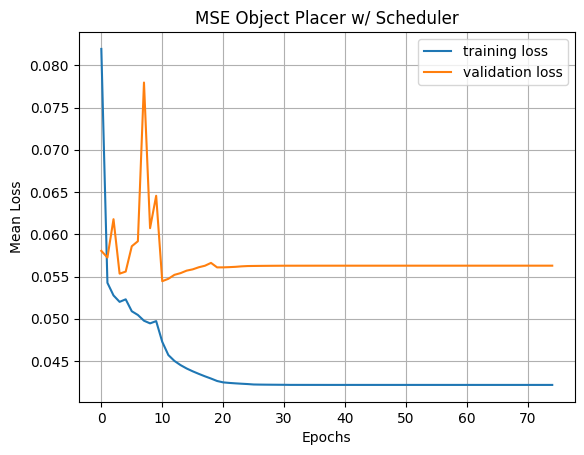

Minimum Mean Loss: 0.0544


In [9]:
# final original object placer loss curve (with scheduler) - for orig dataset size
plot_log_bbox('./training_scripts/learning_curves/locmodel_best_lr_mse.json', "MSE Object Placer w/ Scheduler")

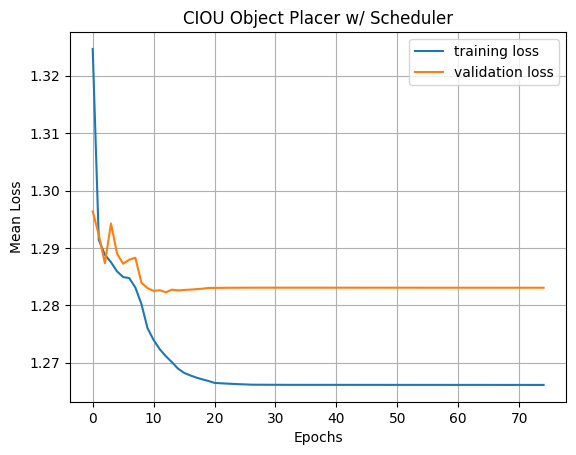

Minimum Mean Loss: 1.2823


In [10]:
# final ciou object placer loss curve (with scheduler) w/ orig dataset
plot_log_bbox('./training_scripts/learning_curves/locmodel_best_lr_ciou.json', "CIOU Object Placer w/ Scheduler")

#### Scheduler and Early Stopping

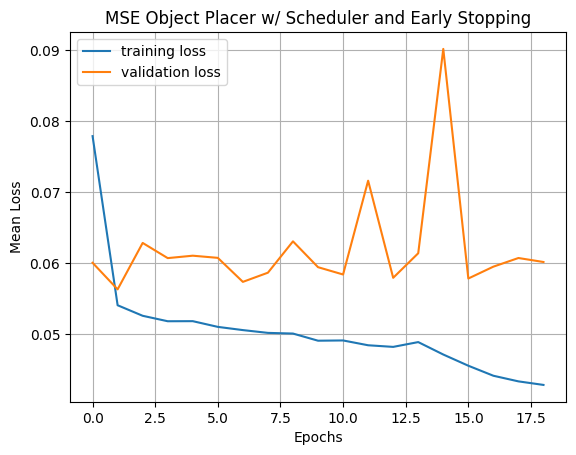

Minimum Mean Loss: 0.0563


In [11]:
# final original object placer loss curve (with scheduler and early stopping) - for orig dataset size
plot_log_bbox('./training_scripts/learning_curves/locmodel_best_early_mse.json', "MSE Object Placer w/ Scheduler and Early Stopping")

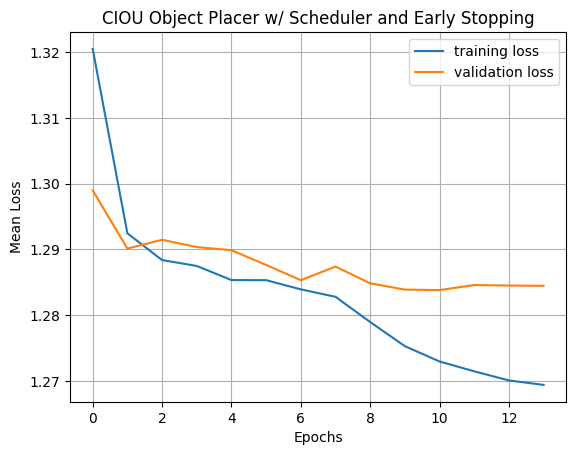

Minimum Mean Loss: 1.2838


In [12]:
# final ciou object placer loss curve (with scheduler and early stopping) - for orig dataset size
plot_log_bbox('./training_scripts/learning_curves/locmodel_best_early_ciou.json', "CIOU Object Placer w/ Scheduler and Early Stopping")

#### Scheduler, Early Stopping, and Dropout

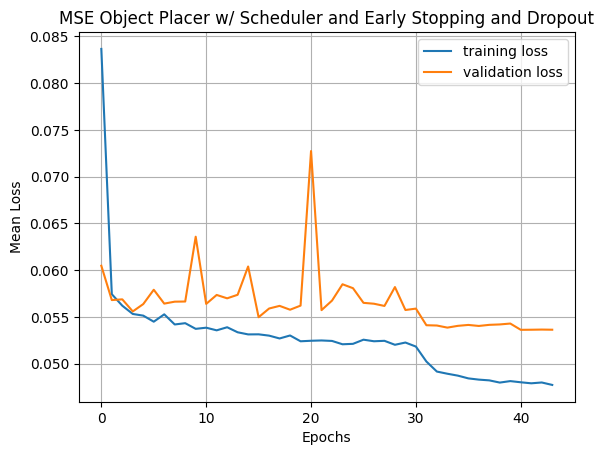

Minimum Mean Loss: 0.0536


In [13]:
# final original object placer loss curve (with dropout) - for orig dataset size
plot_log_bbox('./training_scripts/learning_curves/locmodel_best_dropout_mse.json', "MSE Object Placer w/ Scheduler and Early Stopping and Dropout")

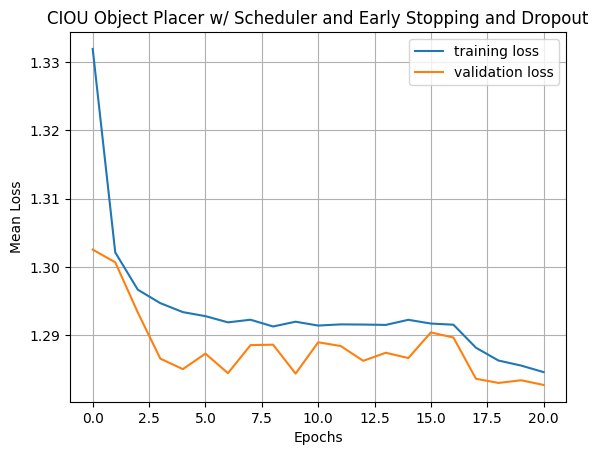

Minimum Mean Loss: 1.2827


In [14]:
# final ciou object placer loss curve (with dropout) - for orig dataset size
plot_log_bbox('./training_scripts/learning_curves/locmodel_best_dropout_ciou.json', "CIOU Object Placer w/ Scheduler and Early Stopping and Dropout")

### Object Placer on BookSum Dataset
Contains the following variants:
- Trained with learning rate scheduler, early stopping, and CIOU Loss
- Trained with learning rate scheduler, early stopping, dropout, and CIOU Loss
- Trained with learning rate scheduler and CIOU Loss FROM SCRATCH
- Trained with learning rate scheduler and MSE Loss FROM SCRATCH

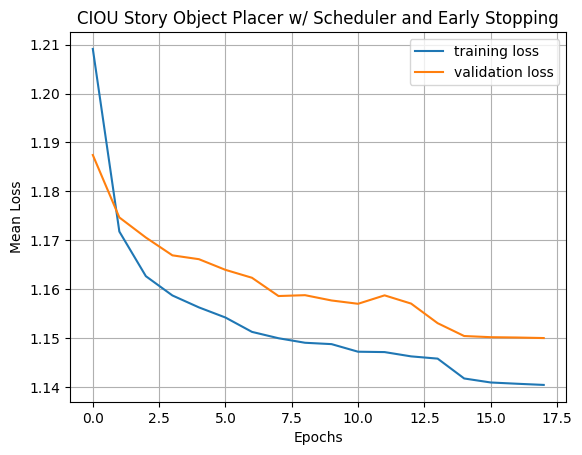

Minimum Mean Loss: 1.15


In [15]:
# ciou + scheduler + early stopping 
plot_log_bbox('./training_scripts/learning_curves/storyloc_best_lr_ciou.json', "CIOU Story Object Placer w/ Scheduler and Early Stopping")

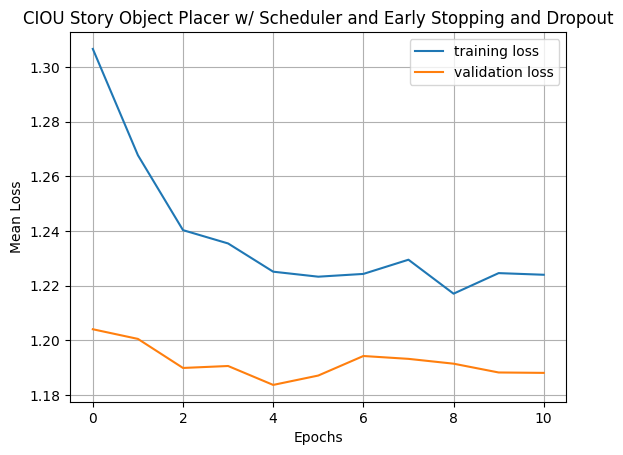

Minimum Mean Loss: 1.1837


In [16]:
# ciou + scheduler + early stopping 
plot_log_bbox('./training_scripts/learning_curves/storyloc_best_dropout_ciou.json', "CIOU Story Object Placer w/ Scheduler and Early Stopping and Dropout")

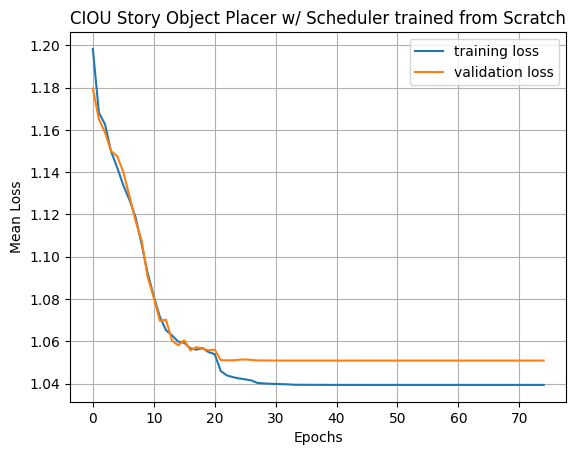

Minimum Mean Loss: 1.0509


In [17]:
# Story object placer trained from scratch
plot_log_bbox('./training_scripts/learning_curves/storyloc_best_scratch_ciou.json', "CIOU Story Object Placer w/ Scheduler trained from Scratch")

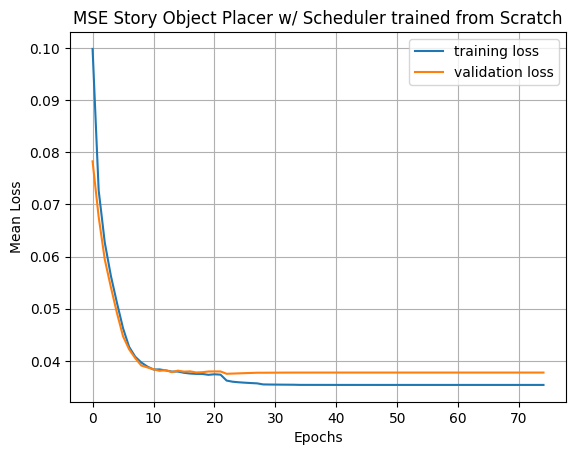

Minimum Mean Loss: 0.0375


In [18]:
# Story object placer trained from scratch (mse)
plot_log_bbox('./training_scripts/learning_curves/storyloc_best_scratch_mse.json', "MSE Story Object Placer w/ Scheduler trained from Scratch")

## Performances of Progress Tracker and Object Placer Variants

### Helper Functions

In [3]:
def pad_tensor(vec, pad, dim):
        pad_size = list(vec.shape)
        pad_size[dim] = pad - vec.size(dim)
        return T.cat([vec, T.zeros(*pad_size, device=device)], dim=dim)

# Used to get labels of chosen slide objects
def get_objects_labels(data, model, loc_model=None):
    outputs = {}
    count = 0
    for book in data:
        out = model(book)
        outputs[book['conf'] + "." + str(book['idd'])] = out
        count += 1

    # get labels of desired objects
    book_labels = {}
    for book_out in outputs:
        book_labels[book_out] = []
        book_objs = outputs[book_out]['pd_obj']
        
        for section_objs in book_objs:
            section_labels = []

            for slide_objs in section_objs:
                slide = {}
                slide_labels = []

                for obj in slide_objs[:-1]:
                    label = T.argmax(obj)
                    slide_labels.append(label.item())
                slide['slide_objs'] = slide_labels

                # calculate bboxes
                if loc_model != None:
                    pd_bbox = []
                    if slide_objs[:-1] != []:
                        pd = T.cat(slide_objs[:-1], dim=0)
                        pd_padded = [pad_tensor(i, 1024, 0) for i in pd]
                        pd_bbox = [loc_model(p).detach().numpy() for p in pd_padded]

                    slide['locations'] = pd_bbox

                section_labels.append(slide)
            book_labels[book_out].append(section_labels)
    return book_labels

In [4]:
# Used to compare groundtruth labels to predicted labels and measure accuracy of object selection
def get_label_accuracies(data, pred):
    pred_labels = []
    for paper in pred:
        sec_labels = []
        for sections in pred[paper]:
            slide_labels = []
            for slides in sections:
                objs_labels = []
                for obj in slides['slide_objs']:
                    label = obj
                    objs_labels.append(label)
                slide_labels.append(objs_labels)
            sec_labels.append(slide_labels)
        pred_labels.append(sec_labels)

    count = 0
    means = []
    for e,f in zip(data, pred_labels):  
        dat = e['out_obj']

        # extra for-loop due to scientific papers having more than one slides for some sections
        cleaned_data = [[[elem for elem in subsublist if elem is not None] for subsublist in sublist if subsublist != []] for sublist in dat if sublist != [] ]
        gt = sum(cleaned_data, [])
        gt = np.array(sum(gt, []))

        # predicted
        pred = sum(f, [])
        pred = np.array(sum(pred, []))

        means.append(np.mean(gt == pred))
        count += 1
    return means

In [11]:
# Used extract: groundtruth bounding boxes, predicted boiunding boxes, and slide size
def get_bboxs(data, pred, type="paper"):
    pred_location = []
    for paper in pred:
        sec_location = []
        for sections in pred[paper]:
            slide_location = []
            for slides in sections:
                objs_location = []
                for obj in slides['locations']:
                    label = obj
                    objs_location.append(label)
                slide_location.append(objs_location)
            sec_location.append(slide_location)
        pred_location.append(sec_location)
    
    count = 0
    pd_bbox = []
    gd_bbox = []
    slide_sizes = []
    for e,f in zip(data, pred_location):
        # ground truth    
        dat = e['out_bbox']

        # extra for-loop due to scientific papers having more than one slides for some sections
        cleaned_data = [[[elem for elem in subsublist if elem is not None] for subsublist in sublist if subsublist != []] for sublist in dat if sublist != [] ]
        new_2 = sum(cleaned_data, [])
        new_2 = np.array(sum(new_2, []))

        # predicted
        new = sum(f, [])
        new = np.array(sum(new, []))

        pd_bbox.append(new)
        gd_bbox.append(new_2)
        if type == "paper":
            slide_sizes.append(e['slide_size'])
        else:
            slide_sizes.append([960, 720])

        count += 1
    return pd_bbox, gd_bbox, slide_sizes


In [12]:
import numpy as np

# Converting bbox format: [left, top, width, height] to [x1, y1, x2, y2] <
def convert_bbox_format(bbox, slide_size):
    slide_width, slide_height = slide_size

    left, top, width, height = bbox
    x1 = left * slide_width
    y1 = top * slide_height
    x2 = (left + width) * slide_width
    y2 = (top + height) * slide_height
    
    return [x1, y1, x2, y2]

# Caluculating intersection-over-union between groundtruth and predicted
def calculate_iou(box1, box2, slide_size):
    # [left, top, width, height] -> [x1, y1, x2, y2]
    box1 = convert_bbox_format(box1, slide_size) 
    box2 = convert_bbox_format(box2, slide_size) 

    # Calculate intersection coordinates
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])
    
    # Calculate intersection area
    inter_width = max(0, x2_inter - x1_inter)
    inter_height = max(0, y2_inter - y1_inter)
    inter_area = inter_width * inter_height
    
    # Calculate area of both bounding boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    # Calculate union area
    union_area = box1_area + box2_area - inter_area
    
    # Calculate IoU
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

# Calculates the average IOU scores of slide objects in a slide
def mean_iou(pred_boxes, gt_boxes, slide_size):
    ious = []
    for pred_box, gt_box in zip(pred_boxes, gt_boxes):
        iou = calculate_iou(pred_box, gt_box, slide_size)
        ious.append(iou)
    
    return np.mean(ious)


### Performance of different Fine-tuned Progress Trackers on BookSum

In [2]:
base_mod = T.load('./models/storybook_model_base_final.pt', map_location=T.device('cpu'))
best_w_lr = T.load('./models/storybook_model_lr_best.pt', map_location=T.device('cpu'))
best_w_earlystopping = T.load('./models/storybook_model_earlystop_best.pt', map_location=T.device('cpu'))
best_w_dropout = T.load('./models/storybook_model_dropout_best.pt', map_location=T.device('cpu'))

stories_dat = {}
for conf in json.load(open('../data/v1.0/book_json.json', 'r')):
    pkl = pickle.load(open(f'./books/{conf}.pkl', 'rb'))
    stories_dat[conf] = {}
    for item in pkl:
        idd = item['idd']
        stories_dat[conf][idd] = item

stories = DLoader(stories_dat, 'test', domain="stories")

m1 = Model().to(device)
m1.load_state_dict(base_mod)

m2 = Model().to(device)
m2.load_state_dict(best_w_lr)

m3 = Model().to(device)
m3.load_state_dict(best_w_earlystopping)

m4 = Model().to(device)
m4.load_state_dict(best_w_dropout)

<All keys matched successfully>

In [5]:
models = [m1, m2, m3, m4]
labels = ["base_mod", "best_w_lr", "best_w_earlystopping", "best_w_dropout"]

for l, m in zip(labels, models):
    story_labels = get_objects_labels(stories, m)
    print(f"{l}:", np.mean(get_label_accuracies(stories, story_labels)))

C:\Users\caraa\AppData\Local\Temp\ipykernel_23176\2863329564.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  means.append(np.mean(gt == pred))


base_mod: 0.6923977710742416
best_w_lr: 0.6983247145011852
best_w_earlystopping: 0.6983247145011852
best_w_dropout: 0.7009956546721254


### Performance of different Object Placers on Original DOC2PPT dataset

In [6]:
loaded_model = T.load('./models/model_hse-tf.pt', map_location=T.device('cpu'))
base_model = Model().to(device)
base_model.load_state_dict(loaded_model)

<All keys matched successfully>

In [7]:
def remove_prefix(model_dict):
    prefix_to_remove = 'module.'
    new_dict = {key[len(prefix_to_remove):] if key.startswith(prefix_to_remove) else key: value for key, value in model_dict.items()}
    return new_dict

In [8]:
base_mod_mse = T.load('./models/locmodel_final_base.pt', map_location=T.device('cpu'))
mse_w_earlystopping = T.load('./models/locmodel_best_early_mse.pt', map_location=T.device('cpu'))
mse_w_dropout = T.load('./models/locmodel_best_dropout_mse.pt', map_location=T.device('cpu'))
mse_w_scheduler = T.load('./models/locmodel_best_lr_mse.pt', map_location=T.device('cpu'))
ciou_final_w_earlystopping = T.load('./models/locmodel_best_early_ciou.pt', map_location=T.device('cpu'))
ciou_final_w_dropout = T.load('./models/locmodel_best_dropout_ciou.pt', map_location=T.device('cpu'))
ciou_scheduler = T.load('./models/locmodel_best_lr_ciou.pt', map_location=T.device('cpu'))

base_mod_mse_dict = remove_prefix(base_mod_mse)
mse_w_earlystopping_dict = remove_prefix(mse_w_earlystopping)
mse_w_dropout_dict = remove_prefix(mse_w_dropout)
mse_w_scheduler_dict = remove_prefix(mse_w_scheduler)
ciou_final_w_earlystopping_dict = remove_prefix(ciou_final_w_earlystopping)
ciou_final_w_dropout_dict = remove_prefix(ciou_final_w_dropout)
ciou_scheduler_dict = remove_prefix(ciou_scheduler)

In [9]:
paper_dat = {}
for conf in json.load(open('./data/v1.0/train_val_test_2.json', 'r')):
    pkl = pickle.load(open(f'./data/v1.0/{conf}.pkl', 'rb'))
    paper_dat[conf] = {}
    for item in pkl:
        idd = item['idd']
        paper_dat[conf][idd] = item

In [10]:
# dataloader
sci_papers = DLoader(paper_dat, 'test', domain="original")

m1 = MLPlayoutBias().to(device)
m1.load_state_dict(base_mod_mse_dict)

m2 = MLPlayout().to(device)
m2.load_state_dict(mse_w_earlystopping_dict)

m3 = MLPlayoutDropout().to(device)
m3.load_state_dict(mse_w_dropout_dict)

m4 = MLPlayout().to(device)
m4.load_state_dict(mse_w_scheduler_dict)

m5 = MLPlayout().to(device)
m5.load_state_dict(ciou_final_w_earlystopping_dict)

m6 = MLPlayoutDropout().to(device)
m6.load_state_dict(ciou_final_w_dropout_dict)

m7 = MLPlayout().to(device)
m7.load_state_dict(ciou_scheduler_dict)

<All keys matched successfully>

In [13]:
loc_models = [m1, m2, m3, m4, m5, m6, m7]
labels = ['base_mod_mse', 'mse_w_earlystopping', 'mse_w_dropout', 'mse_w_scheduler', 'ciou_w_earlystopping', 'ciou_w_dropout', 'ciou_w_scheduler']

for l, lm in zip(labels, loc_models):
    science_labels = get_objects_labels(sci_papers, base_model, loc_model=lm)
    pd_base, gd_base, sizes = get_bboxs(sci_papers, science_labels)
    means = []
    for pred_boxes, gt_boxes, slide_size in zip(pd_base, gd_base, sizes):
        mean_iou_score = mean_iou(pred_boxes, gt_boxes, slide_size)
        means.append(mean_iou_score)
    print(f"{l}:", np.mean(means))
        

base_mod_mse: 0.07846920189834805
mse_w_earlystopping: 0.05702245251470437
mse_w_dropout: 0.05203724516806317
mse_w_scheduler: 0.0564477042831456
ciou_w_earlystopping: 0.09370781482927734
ciou_w_dropout: 0.08278256173359375
ciou_w_scheduler: 0.08509002627593391


### Performance of Fine-tuned Object Placer on BookSum dataset

In [14]:
ciou_story_loc = T.load('./models/storyloc_best_lr_ciou.pt', map_location=T.device('cpu'))
ciou_story_loc_dropout = T.load('./models/storyloc_best_dropout_ciou.pt', map_location=T.device('cpu'))
ciou_story_loc_scratch = T.load('./models/storyloc_best_scratch_ciou.pt', map_location=T.device('cpu'))
mse_story_loc_scratch = T.load('./models/storyloc_best_scratch_mse.pt', map_location=T.device('cpu'))

ciou_story_loc_dict = remove_prefix(ciou_story_loc)
ciou_story_loc_dropout_dict = remove_prefix(ciou_story_loc_dropout)
ciou_story_loc_scratch_dict = remove_prefix(ciou_story_loc_scratch)
mse_story_loc_scratch_dict = remove_prefix(mse_story_loc_scratch)

stories_dat = {}
for conf in json.load(open('./data/v1.0/book_json.json', 'r')):
    pkl = pickle.load(open(f'./books/{conf}.pkl', 'rb'))
    stories_dat[conf] = {}
    for item in pkl:
        idd = item['idd']
        stories_dat[conf][idd] = item
stories = DLoader(stories_dat, typ='test', domain='stories')

m1 = MLPlayout().to(device)
m1.load_state_dict(ciou_story_loc_dict)

m2 = MLPlayoutDropout().to(device)
m2.load_state_dict(ciou_story_loc_dropout_dict)

m3 = MLPlayout().to(device)
m3.load_state_dict(ciou_story_loc_scratch_dict)

m4 = MLPlayout().to(device)
m4.load_state_dict(mse_story_loc_scratch_dict)

<All keys matched successfully>

In [15]:
ciou_model = Model().to(device)
loaded_model = T.load('./models/storybook_model_dropout_best.pt', map_location=device, weights_only=True)
ciou_model.load_state_dict(loaded_model)

<All keys matched successfully>

In [16]:
loc_models = [m1, m2, m3, m4]
labels = ['ciou_story_loc_earlystopping', 'ciou_story_loc_dropout', 'ciou_story_loc_scratch', 'mse_story_loc_scratch']

for l, lm in zip(labels, loc_models):
    story_labels = get_objects_labels(stories, ciou_model, lm)
    pd_base, gd_base, sizes = get_bboxs(stories, story_labels, type="stories")
    means = []
    for pred_boxes, gt_boxes, slide_size in zip(pd_base, gd_base, sizes):
        mean_iou_score = mean_iou(pred_boxes, gt_boxes, slide_size)
        means.append(mean_iou_score)
    print(f"{l}:", np.mean(means))
        

ciou_story_loc_earlystopping: 0.2748825583916518
ciou_story_loc_dropout: 0.16555119620980616
ciou_story_loc_scratch: 0.3346567178478176
mse_story_loc_scratch: 0.3051766806614385
